In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n, alfa):
        self.W = np.random.uniform(-1, 1, n)
        self.b = np.random.uniform(-1, 1, 1)
        self.alfa = alfa
        self.registro_errores = []
        
    def train(self, X, T, epocas):
        
        self.registro_errores = []
        for i in range(epocas):
            errores = []
            for x, t in zip(X, T):
                a = np.heaviside(np.dot(self.W, x) - self.b, 1)
                errores.append((t - a)**2)
                if(a != t):
                    self.W[0] += self.alfa * (t - a) * x[0]
                    self.W[1] += self.alfa * (t - a) * x[1]
                    self.b -= self.alfa * (t - a)
            self.registro_errores.append(sum(errores) / len(T))
                    
    def classify(self, x):
        return np.heaviside(np.dot(self.W, x) - self.b, 1)


W: [-0.36295424 -0.76917252], b: [0.63156335]


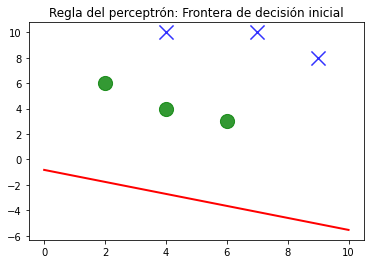

In [2]:
perceptron_1 = Perceptron(2, 0.25)
print(f"W: {perceptron_1.W}, b: {perceptron_1.b}")

X = np.array([[2, 6], [4, 4], [6, 3], [4, 10], [7, 10], [9, 8]])
T = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

x1 = np.linspace(0, 10)
x2 = perceptron_1.b / perceptron_1.W[1] - (x1 * perceptron_1.W[0] / perceptron_1.W[1])

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

Incial: W: [-0.36295424 -0.76917252], b: [0.63156335]
Final: W: [0.13704576 0.23082748], b: [2.13156335]


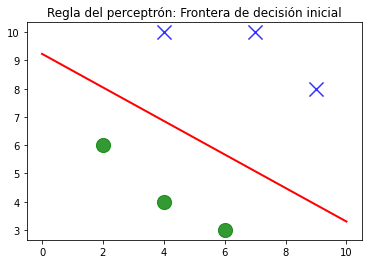

In [3]:
print(f"Incial: W: {perceptron_1.W}, b: {perceptron_1.b}")
num_epocas = 50
perceptron_1.train(X, T, num_epocas)
print(f"Final: W: {perceptron_1.W}, b: {perceptron_1.b}")

x1 = np.linspace(0, 10)
x2 = (perceptron_1.b / perceptron_1.W[1]) - (x1 * perceptron_1.W[0] / perceptron_1.W[1])

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

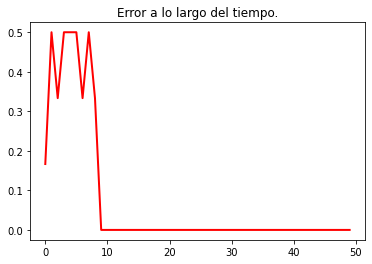

In [4]:
errores = []
for e in perceptron_1.registro_errores:
    errores.append(e[0])

e = np.array(errores)

plt.figure(1)
plt.plot(e, 'red', linewidth = 2)

plt.title('Error a lo largo del tiempo.')
plt.show()


Clase resultante para [5 5]: 0.0
Clase resultante para [6 8]: 1.0


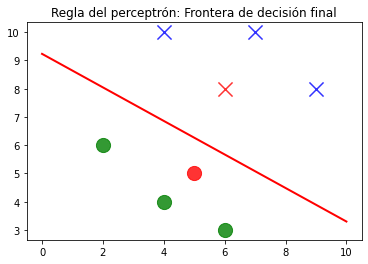

In [5]:
test_data = np.array([[5, 5], [6, 8]])
test_data_classes = np.zeros(2)

for i in range(np.shape(test_data)[0]):
    pattern_class = perceptron_1.classify(test_data[i])
    test_data_classes[i] = pattern_class
    print(f"Clase resultante para {test_data[i]}: {test_data_classes[i]}")
    

plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)    
    
for x, t in zip(X, T):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)
        
for x, t in zip(test_data, test_data_classes):
    if t == 0:
        plt.scatter(x[0], x[1], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'r', s = 200, marker = 'x', alpha = 0.8)    

plt.title('Regla del perceptrón: Frontera de decisión final')
plt.show()    